# Etape 4 :Prévision des Incendies à l'aide des Données Météorologiques et de Végétation

## Objectif

Ce notebook a pour objectif de fusionner les données météorologiques et de végétation des deux pays (Portugal et Grèce) afin de construire un ensemble de données complet. Cet ensemble de données sera utilisé pour entraîner et évaluer des modèles de machine learning et de deep learning pour la prédiction des incendies. Les étapes principales incluent :

1. Chargement et prétraitement des données de chaque pays.
2. Fusion des données météorologiques et de végétation.
3. Visualisation et Analyse de données
4. Entraînement et évaluation des modèles de prédiction.


## Chargement et Prétraitement des Données

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

In [31]:
weather_data_Portugal = pd.read_csv("data_Portugal__.csv")

In [32]:
weather_data_Portugal

,latitude,longitude,class,date,max_temperature,min_temperature,mean_temperatur,max_humidity,min_humidity,mean_humidity,total_precipitation,max_soil_temperature,min_soil_temperature,mean_soil_temperature,min_soil_moisture,mean_soil_moisture,max_wind_speed,total_rain
0,39.8053,-8.6446,not fire,2023-08-03 14:08:00+00:00,26.064001,15.613999,20.176500,98.444725,59.126102,82.937073,1.8,26.714001,18.864000,22.547333,0.102,0.113292,23.863411,1.8
1,40.9737,-7.9931,not fire,2023-02-13 13:54:00+00:00,6.576500,-1.323500,1.855667,85.143608,57.491592,72.135567,0.0,6.026500,-0.273500,2.432750,0.326,0.330333,15.077082,0.0
2,37.4558,-8.6925,fire,2023-08-07 14:25:00+00:00,34.023003,22.872999,27.779245,51.871464,18.076952,33.507095,0.0,40.523003,22.022999,30.775085,0.074,0.075208,17.673029,0.0
3,39.7427,-7.7687,fire,2023-08-05 10:35:00+00:00,33.468502,17.968500,25.524750,57.478100,13.125694,31.453638,0.0,38.968502,21.018501,29.072668,0.092,0.092000,25.202570,0.0
4,39.7274,-7.7657,fire,2023-08-05 13:03:00+00:00,33.468502,17.968500,26.095581,53.350155,13.125694,27.505592,0.0,38.968502,21.018501,29.360168,0.092,0.092000,25.202570,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,37.3930,-8.6284,fire,2023-08-07 21:22:00+00:00,38.552998,22.703001,30.071753,44.678986,13.425508,28.836119,0.0,40.653000,24.552999,31.548834,0.108,0.109333,24.442913,0.0
1072,39.7776,-7.7632,fire,2023-08-05 10:35:00+00:00,32.181499,17.031500,24.581497,54.152946,13.233459,31.745611,0.0,36.631500,19.681499,27.423164,0.095,0.095000,25.924999,0.0
1073,37.4010,-8.7115,fire,2023-08-06 22:19:00+00:00,34.699001,23.549000,28.138580,49.370903,16.209232,32.658298,0.0,39.648998,22.698999,30.163584,0.074,0.076083,23.893261,0.0
1074,37.4002,-8.6646,not fire,2023-08-27 14:25:00+00:00,23.991999,17.741999,20.887835,81.278290,56.523777,65.929955,0.0,31.691999,20.642000,25.889915,0.072,0.073750,28.802248,0.0


In [33]:
vegetation_data_Portugal = pd.read_csv("vegetation_data_Portugal.csv")

In [34]:
vegetation_data_Portugal

,latitude,longitude,acq_date,acq_time,class,NDVI,EVI
0,37.3985,-8.6835,2023-08-17,1425,not fire,-0.3000,-0.3000
1,37.4013,-8.6667,2023-08-28,226,not fire,-0.3000,-0.3000
2,39.8053,-8.6446,2023-08-23,1408,fire,-0.3000,-0.3000
3,37.4676,-8.6956,2023-08-27,2259,not fire,-0.3000,-0.3000
4,41.6909,-7.8587,2023-02-05,2234,fire,0.5961,0.2454
...,...,...,...,...,...,...,...
801,37.1881,-8.8695,2023-08-27,1425,not fire,-0.3000,-0.3000
802,41.8782,-7.1245,2023-02-07,1359,not fire,0.3813,0.1140
803,40.5344,-7.8130,2023-08-13,2226,not fire,0.6571,0.4218
804,41.5956,-7.9539,2023-02-21,2146,not fire,0.4727,0.1434


In [35]:
# Étape 1: Formater acq_time pour avoir le format hh:mm
vegetation_data_Portugal['acq_time'] = vegetation_data_Portugal['acq_time'].apply(lambda x: f'{x:04}')  # Ajoute des zéros à gauche pour avoir 4 chiffres
vegetation_data_Portugal['acq_time'] = vegetation_data_Portugal['acq_time'].str[:2] + ':' + vegetation_data_Portugal['acq_time'].str[2:]  # Ajoute le deux-points

# Étape 2: Créer la colonne datetime à partir de acq_date et acq_time
vegetation_data_Portugal['date'] = pd.to_datetime(vegetation_data_Portugal['acq_date'] + ' ' + vegetation_data_Portugal['acq_time'])

# Étape 3: Convertir en format ISO avec fuseau horaire UTC
vegetation_data_Portugal['date'] = vegetation_data_Portugal['date'].dt.strftime('%Y-%m-%d %H:%M:%S+00:00')

In [36]:
vegetation_data_Portugal.drop(["acq_time", "acq_date"], axis =1 , inplace = True)

In [37]:
vegetation_data_Portugal = vegetation_data_Portugal[vegetation_data_Portugal ["EVI"] != -0.3 ] 

In [38]:
vegetation_data_Portugal

,latitude,longitude,class,NDVI,EVI,date
4,41.6909,-7.8587,fire,0.5961,0.2454,2023-02-05 22:34:00+00:00
7,41.0627,-8.1266,not fire,0.5066,0.2872,2023-08-28 10:59:00+00:00
11,41.3043,-8.2778,fire,0.5991,0.3317,2023-02-19 22:19:00+00:00
13,40.1208,-7.4039,not fire,0.4948,0.2991,2023-08-05 11:06:00+00:00
15,41.3207,-7.3189,not fire,0.5517,0.2860,2023-08-04 21:14:00+00:00
...,...,...,...,...,...,...
798,41.1899,-7.8875,fire,0.6532,0.3034,2023-08-22 02:22:00+00:00
799,41.6444,-8.1323,not fire,0.6478,0.2490,2023-02-18 14:10:00+00:00
802,41.8782,-7.1245,not fire,0.3813,0.1140,2023-02-07 13:59:00+00:00
803,40.5344,-7.8130,not fire,0.6571,0.4218,2023-08-13 22:26:00+00:00


## Fusion des Données

Nous fusionnons les ensembles de données météorologiques et de végétation pour créer un ensemble de données unique. Cette fusion est essentielle pour combiner toutes les caractéristiques pertinentes qui influencent la probabilité d'incendie.

In [39]:
data_Portugal = pd.merge(weather_data_Portugal, vegetation_data_Portugal, on=['longitude', 'latitude', 'date'], how='inner')

In [40]:
data_Portugal.drop(["class_y"], axis = 1 , inplace = True ) 

In [21]:
weather_data_Greece = pd.read_csv("data_Greece__.csv")

In [22]:
weather_data_Greece

,latitude,longitude,class,date,max_temperature,min_temperature,mean_temperatur,max_humidity,min_humidity,mean_humidity,total_precipitation,max_soil_temperature,min_soil_temperature,mean_soil_temperature,min_soil_moisture,mean_soil_moisture,max_wind_speed,total_rain
0,40.8753,25.7921,fire,2023-08-22 00:43:00+00:00,37.216999,26.617001,30.902418,39.357601,17.723669,30.505224,0.0,35.267002,26.867001,30.550341,0.139,0.141958,27.887802,0.0
1,41.0431,26.0011,not fire,2023-08-02 09:02:00+00:00,28.542500,18.292500,23.475836,88.970711,43.260834,64.741280,1.0,32.292503,20.892500,26.186251,0.134,0.136042,14.336861,1.0
2,36.1087,27.9427,fire,2023-07-24 00:08:00+00:00,42.440998,29.140999,34.430580,44.080235,12.869796,30.432993,0.0,43.241001,30.890999,36.230587,0.106,0.106000,20.873791,0.0
3,40.8936,25.7387,not fire,2023-08-02 11:48:00+00:00,26.299501,19.999500,23.532837,81.271935,54.133595,68.430412,0.9,29.199501,21.699501,25.234915,0.240,0.240750,10.383987,0.9
4,36.2543,27.9132,not fire,2023-07-30 00:37:00+00:00,33.522499,21.922499,26.220411,77.584366,20.738951,54.043488,0.0,38.822498,25.272499,30.801664,0.104,0.104000,21.578989,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,36.2037,28.0475,not fire,2023-07-14 11:11:00+00:00,37.451000,27.650999,32.717670,48.621288,21.819862,33.412159,0.0,44.501003,29.051001,36.519749,0.095,0.095000,14.904173,0.0
7163,36.0895,27.9149,not fire,2023-07-07 09:21:00+00:00,35.335503,21.685499,27.285500,94.921204,33.652458,68.450455,0.0,40.035500,25.235498,31.420919,0.100,0.105583,17.477621,0.0
7164,40.3457,23.4106,not fire,2023-08-02 11:48:00+00:00,27.727999,21.577999,24.617584,82.922882,56.562672,68.786919,0.6,30.028000,22.878000,26.036333,0.222,0.224208,10.829958,0.6
7165,36.0612,27.8905,fire,2023-07-25 11:52:00+00:00,38.234501,28.834499,32.582417,50.019516,17.424505,35.326164,0.0,40.934498,31.184500,35.580334,0.107,0.107000,32.399998,0.0


In [23]:
vegetation_data_Greece = pd.read_csv("vegetation_data_greece.csv")

In [26]:
vegetation_data_Greece

,latitude,longitude,acq_date,acq_time,class,NDVI,EVI
0,40.8663,26.0900,2023-08-21,822,fire,0.5877,0.3568
1,36.9605,22.5165,2023-07-09,1236,not fire,0.7502,0.5025
2,40.9900,26.0609,2023-08-02,43,not fire,0.7915,0.4595
3,39.2366,22.3281,2023-07-26,1235,fire,0.8891,0.7208
4,36.1242,27.9519,2023-08-12,817,not fire,0.8155,0.6588
...,...,...,...,...,...,...,...
7162,36.0525,27.9072,2023-07-15,1152,not fire,0.7188,0.4605
7163,36.1308,27.9181,2023-07-14,1111,not fire,0.9088,0.7307
7164,39.3120,22.8040,2023-08-06,2024,not fire,0.5419,0.2849
7165,39.3522,22.7633,2023-07-17,35,not fire,0.8138,0.7521


In [27]:
# Étape 1: Formater acq_time pour avoir le format hh:mm
vegetation_data_Greece['acq_time'] = vegetation_data_Greece['acq_time'].apply(lambda x: f'{x:04}')  # Ajoute des zéros à gauche pour avoir 4 chiffres
vegetation_data_Greece['acq_time'] = vegetation_data_Greece['acq_time'].str[:2] + ':' + vegetation_data_Greece['acq_time'].str[2:]  # Ajoute le deux-points

# Étape 2: Créer la colonne datetime à partir de acq_date et acq_time
vegetation_data_Greece['date'] = pd.to_datetime(vegetation_data_Greece['acq_date'] + ' ' + vegetation_data_Greece['acq_time'])

# Étape 3: Convertir en format ISO avec fuseau horaire UTC
vegetation_data_Greece['date'] = vegetation_data_Greece['date'].dt.strftime('%Y-%m-%d %H:%M:%S+00:00')

In [28]:
vegetation_data_Greece.drop(["acq_time", "acq_date"], axis =1 , inplace = True)

In [30]:
data_Greece = pd.merge(weather_data_Greece, vegetation_data_Greece, on=['longitude', 'latitude', 'date'], how='inner')

In [41]:
data_Greece.drop(["class_y"], axis = 1 , inplace = True ) 

In [42]:
data_Greece

,latitude,longitude,class_x,date,max_temperature,min_temperature,mean_temperatur,max_humidity,min_humidity,mean_humidity,total_precipitation,max_soil_temperature,min_soil_temperature,mean_soil_temperature,min_soil_moisture,mean_soil_moisture,max_wind_speed,total_rain,NDVI,EVI
0,40.8753,25.7921,fire,2023-08-22 00:43:00+00:00,37.216999,26.617001,30.902418,39.357601,17.723669,30.505224,0.0,35.267002,26.867001,30.550341,0.139,0.141958,27.887802,0.0,0.8395,0.5085
1,41.0431,26.0011,not fire,2023-08-02 09:02:00+00:00,28.542500,18.292500,23.475836,88.970711,43.260834,64.741280,1.0,32.292503,20.892500,26.186251,0.134,0.136042,14.336861,1.0,0.7662,0.3788
2,36.1087,27.9427,fire,2023-07-24 00:08:00+00:00,42.440998,29.140999,34.430580,44.080235,12.869796,30.432993,0.0,43.241001,30.890999,36.230587,0.106,0.106000,20.873791,0.0,0.8786,0.6579
3,40.8936,25.7387,not fire,2023-08-02 11:48:00+00:00,26.299501,19.999500,23.532837,81.271935,54.133595,68.430412,0.9,29.199501,21.699501,25.234915,0.240,0.240750,10.383987,0.9,0.8356,0.4408
4,36.2543,27.9132,not fire,2023-07-30 00:37:00+00:00,33.522499,21.922499,26.220411,77.584366,20.738951,54.043488,0.0,38.822498,25.272499,30.801664,0.104,0.104000,21.578989,0.0,0.7715,0.5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,36.2037,28.0475,not fire,2023-07-14 11:11:00+00:00,37.451000,27.650999,32.717670,48.621288,21.819862,33.412159,0.0,44.501003,29.051001,36.519749,0.095,0.095000,14.904173,0.0,0.8881,0.5753
7163,36.0895,27.9149,not fire,2023-07-07 09:21:00+00:00,35.335503,21.685499,27.285500,94.921204,33.652458,68.450455,0.0,40.035500,25.235498,31.420919,0.100,0.105583,17.477621,0.0,0.9119,0.5890
7164,40.3457,23.4106,not fire,2023-08-02 11:48:00+00:00,27.727999,21.577999,24.617584,82.922882,56.562672,68.786919,0.6,30.028000,22.878000,26.036333,0.222,0.224208,10.829958,0.6,0.4086,0.2646
7165,36.0612,27.8905,fire,2023-07-25 11:52:00+00:00,38.234501,28.834499,32.582417,50.019516,17.424505,35.326164,0.0,40.934498,31.184500,35.580334,0.107,0.107000,32.399998,0.0,0.8991,0.6448


In [43]:
data_Portugal

,latitude,longitude,class_x,date,max_temperature,min_temperature,mean_temperatur,max_humidity,min_humidity,mean_humidity,total_precipitation,max_soil_temperature,min_soil_temperature,mean_soil_temperature,min_soil_moisture,mean_soil_moisture,max_wind_speed,total_rain,NDVI,EVI
0,40.9737,-7.9931,not fire,2023-02-13 13:54:00+00:00,6.576500,-1.323500,1.855667,85.143608,57.491592,72.135567,0.0,6.026500,-0.273500,2.432750,0.326,0.330333,15.077082,0.0,0.5672,0.2734
1,40.5304,-7.8067,not fire,2023-08-03 22:26:00+00:00,25.980999,12.581000,19.330999,100.000000,39.635067,78.045395,1.6,28.580999,16.681000,22.556000,0.090,0.096583,22.553936,1.6,0.6268,0.3599
2,41.6684,-8.1165,not fire,2023-02-24 22:11:00+00:00,6.151000,-3.149000,0.780167,90.460365,48.668182,76.154129,0.2,8.901000,0.201000,3.659333,0.281,0.282750,13.896187,0.1,0.5731,0.2130
3,41.1871,-7.9548,not fire,2023-02-17 11:13:00+00:00,11.673500,0.323500,6.413084,89.690689,55.563210,70.524910,0.0,9.373501,0.073500,4.069333,0.294,0.297167,9.387650,0.0,0.7362,0.2358
4,41.6516,-6.5686,not fire,2023-08-30 21:47:00+00:00,27.539999,13.040000,19.987917,92.426659,25.499697,56.613403,0.0,29.590000,17.340000,23.008751,0.143,0.144667,20.929594,0.0,0.5337,0.2829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,41.6742,-8.3403,not fire,2023-02-07 13:59:00+00:00,14.962500,5.612500,9.420835,57.240898,43.252010,47.950237,0.0,14.012500,6.512500,9.381249,0.325,0.327958,23.402769,0.0,0.6852,0.3268
304,41.6897,-8.2084,not fire,2023-08-26 03:05:00+00:00,25.237499,14.837501,19.650000,97.490089,55.534138,79.448067,0.0,29.237499,18.237499,22.829165,0.184,0.191667,11.159999,0.0,0.7160,0.3573
305,41.7995,-7.9797,not fire,2023-02-25 13:41:00+00:00,5.176000,-4.474000,0.488500,93.781410,57.914379,77.792290,0.1,6.876000,-0.324000,2.146833,0.400,0.404500,9.064569,0.1,0.5832,0.2386
306,40.1208,-7.4039,not fire,2023-08-15 11:06:00+00:00,29.667500,13.017500,20.667498,80.696815,17.988802,51.658222,0.0,37.367500,17.517500,26.404999,0.082,0.082000,21.422270,0.0,0.4975,0.3010


## Création d'un Dataset Final

L'objectif de cette étape est de créer un dataset final combinant toutes les caractéristiques météorologiques et de végétation pour les deux pays, le Portugal et la Grèce. Cela implique :

1. **Fusionner les données par pays** : Les données météorologiques et de végétation sont d'abord fusionnées pour chaque pays sur la base des coordonnées géographiques (longitude, latitude) et des dates correspondantes.
2. **Combiner les pays** : Les datasets individuels des deux pays sont ensuite combinés en un seul ensemble de données.

In [44]:
data_fire_prediction = pd.concat([data_Portugal, data_Greece], ignore_index=True)

In [46]:
data_fire_prediction = concatenated_df.sample(frac=1).reset_index(drop=True)

In [47]:
data_fire_prediction 

,latitude,longitude,class_x,date,max_temperature,min_temperature,mean_temperatur,max_humidity,min_humidity,mean_humidity,total_precipitation,max_soil_temperature,min_soil_temperature,mean_soil_temperature,min_soil_moisture,mean_soil_moisture,max_wind_speed,total_rain,NDVI,EVI
0,41.0282,25.9971,not fire,2023-08-01 19:26:00+00:00,28.665501,18.565500,23.557165,88.992470,39.849396,62.491623,2.2,31.865501,21.165501,25.996750,0.115,0.132750,21.566973,2.2,0.8296,0.4065
1,38.0130,24.5066,fire,2023-07-24 11:11:00+00:00,35.855503,26.355499,31.397169,38.162220,18.321728,28.543907,0.0,40.805500,27.505499,34.249252,0.119,0.119583,20.724247,0.0,0.7903,0.4569
2,36.0714,27.8883,not fire,2023-07-15 11:52:00+00:00,42.477501,28.727501,35.333752,41.816757,11.068194,25.904068,0.0,45.127502,29.377501,36.644169,0.105,0.105958,14.182355,0.0,0.8896,0.6165
3,39.7570,19.8847,not fire,2023-07-03 20:58:00+00:00,22.858500,16.958500,19.741833,90.619209,56.686943,78.406471,1.9,23.758501,17.808500,20.812666,0.168,0.187875,19.671949,1.9,0.7835,0.5335
4,40.9957,26.1342,not fire,2023-08-03 09:43:00+00:00,32.584000,20.233999,26.658998,77.801048,40.428844,57.791473,0.0,35.984001,22.633999,29.190248,0.110,0.110542,17.826363,0.0,0.7763,0.4017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,38.2492,22.8644,fire,2023-08-22 11:47:00+00:00,33.265999,22.016001,27.978502,63.273567,24.269514,39.608059,0.0,33.216003,23.365999,27.836830,0.166,0.167875,25.499081,0.0,0.4250,0.2340
7471,40.9506,25.7432,not fire,2023-08-13 09:43:00+00:00,28.980499,19.380501,23.730499,54.049038,26.196789,40.627892,0.0,30.480499,20.330500,25.182585,0.110,0.111500,29.743059,0.0,0.5323,0.3069
7472,41.0387,26.1648,not fire,2023-08-12 11:48:00+00:00,28.920500,18.570501,23.443415,76.173340,28.643171,48.703655,0.0,29.370501,20.920500,25.091333,0.130,0.132125,24.993439,0.0,0.7755,0.4825
7473,36.0807,27.9003,not fire,2023-07-05 23:54:00+00:00,34.426498,23.776499,28.736917,69.813583,38.123817,52.049747,0.0,42.076500,26.226500,33.403584,0.067,0.067417,13.684735,0.0,0.9133,0.6276


In [48]:
variable_cible = data_fire_prediction["class_x"]

In [49]:
data_fire_prediction.drop(["class_x"], axis = 1 , inplace = True )

In [83]:
data_fire_prediction["class"] = variable_cible

C:\Users\HP\AppData\Local\Temp\ipykernel_20108\3660098562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fire_prediction["class"] = variable_cible


In [52]:
data_fire_prediction.to_csv("data_fire_prediction.csv", index = False)

In [92]:
data_fire_prediction = pd.read_csv("data_fire_prediction.csv")

In [93]:
data_fire_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               7475 non-null   float64
 1   longitude              7475 non-null   float64
 2   date                   7475 non-null   object 
 3   max_temperature        7475 non-null   float64
 4   min_temperature        7475 non-null   float64
 5   mean_temperatur        7475 non-null   float64
 6   max_humidity           7475 non-null   float64
 7   min_humidity           7475 non-null   float64
 8   mean_humidity          7475 non-null   float64
 9   total_precipitation    7475 non-null   float64
 10  max_soil_temperature   7475 non-null   float64
 11  min_soil_temperature   7475 non-null   float64
 12  mean_soil_temperature  7475 non-null   float64
 13  min_soil_moisture      7475 non-null   float64
 14  mean_soil_moisture     7475 non-null   float64
 15  max_

In [94]:
data_fire_prediction["class"].unique()

array(['not fire', 'fire'], dtype=object)

## Visualisation des données

"""

Nous dessinons la distribution des données pour les classes "fire" et "not fire" afin de visualiser comment ces classes sont réparties dans notre dataset. 


"""

<function matplotlib.pyplot.show(close=None, block=None)>

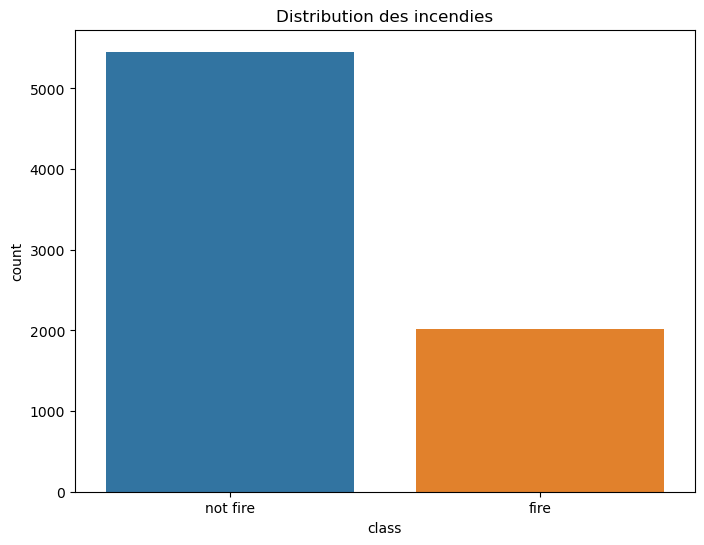

In [95]:
# Tracer le graphique
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data_fire_prediction)
plt.title('Distribution des incendies')
plt.show

"""

Dans cette étape, nous supprimons les colonnes  `latitude`, `longitude`, et `date`, afin de ne conserver que les variables explicatives et la cible pour le modèle de prédiction des incendies.

"""

In [96]:
data_fire_prediction.drop(["latitude","longitude","date"], axis = 1 , inplace= True)

"""

Dans cette étape, nous visualisons les distributions des valeurs numériques ainsi que leurs distributions par classe (`fire` ou `not fire`). Ces visualisations nous aident à comprendre la variation des données et comment ces variations se manifestent entre les classes. Cela est crucial pour identifier les caractéristiques les plus influentes et comprendre les patterns présents dans les données.

"""


In [97]:
numerical = data_fire_prediction.select_dtypes('number').columns.to_list()
loan_num = data_fire_prediction[numerical]


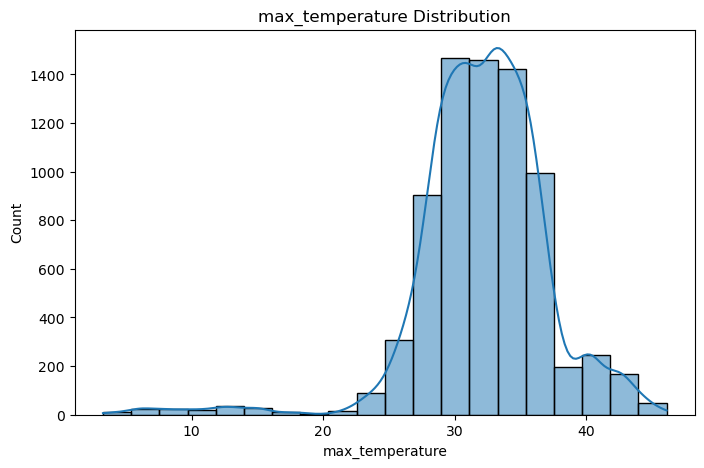

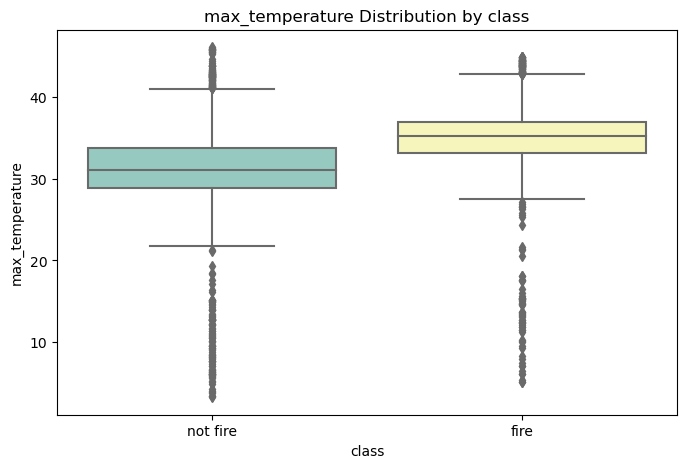

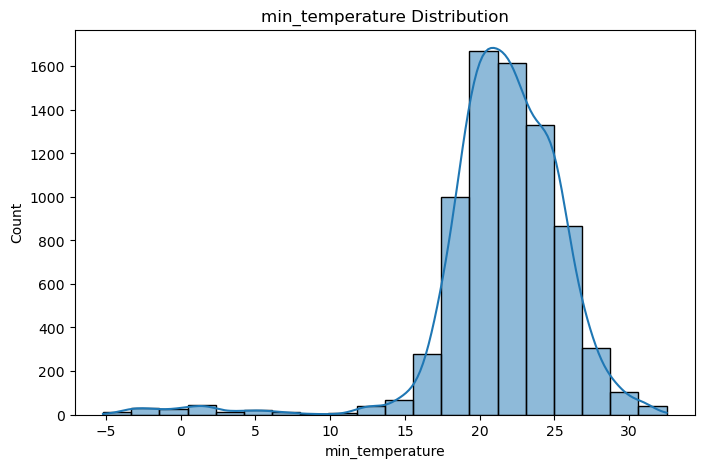

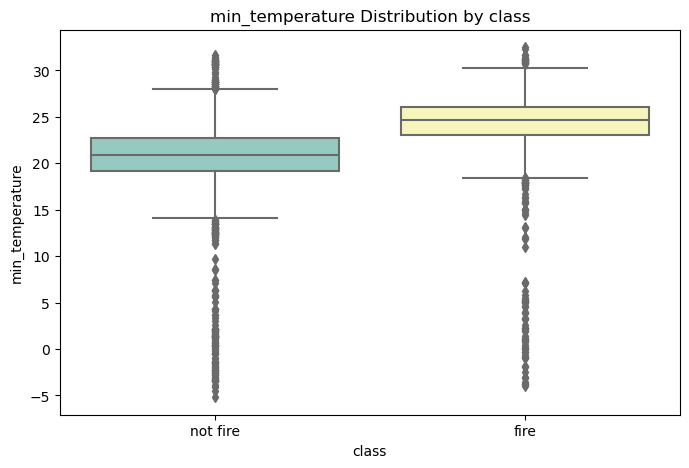

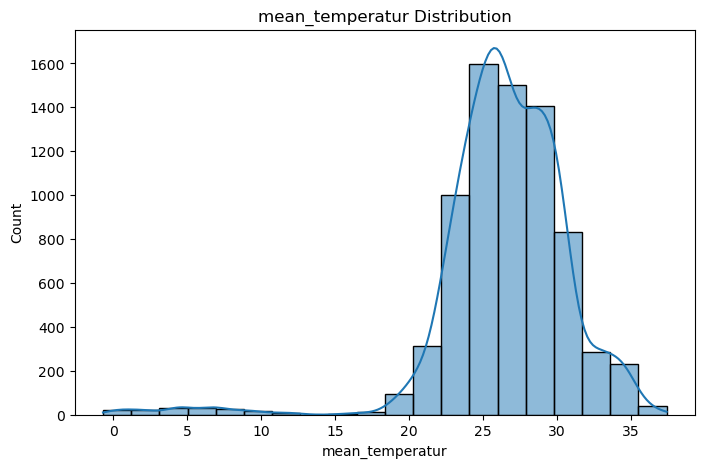

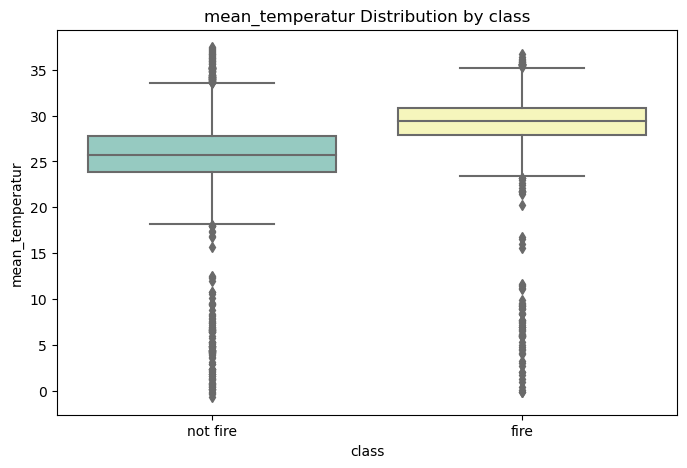

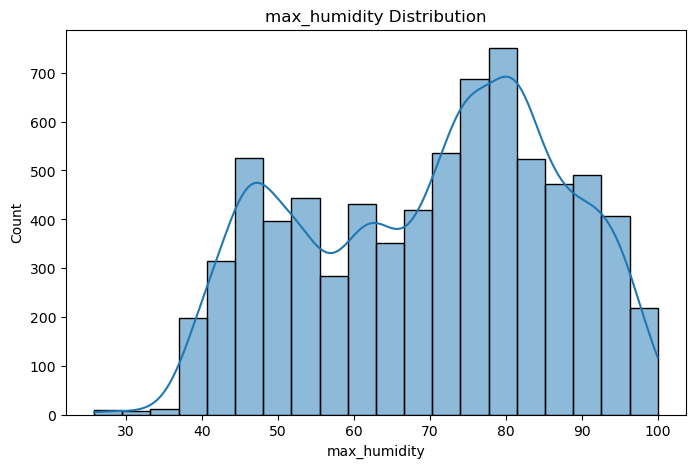

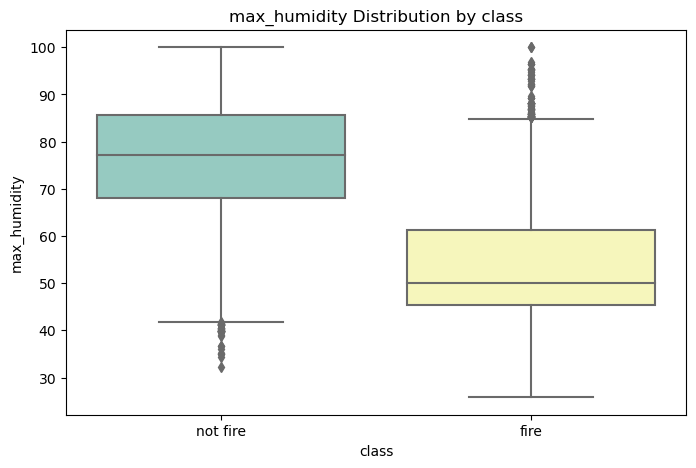

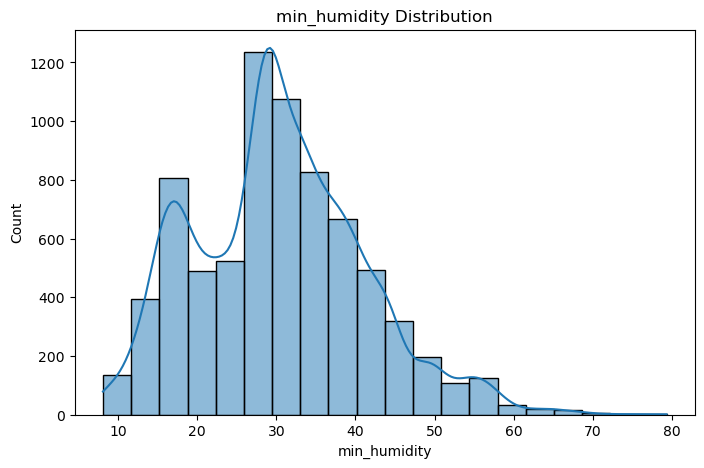

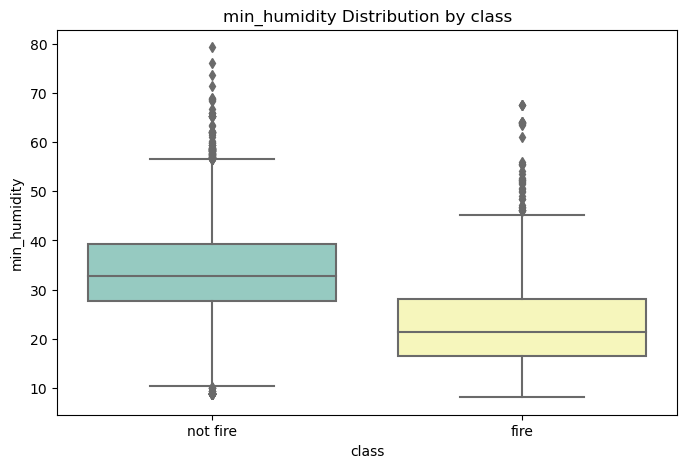

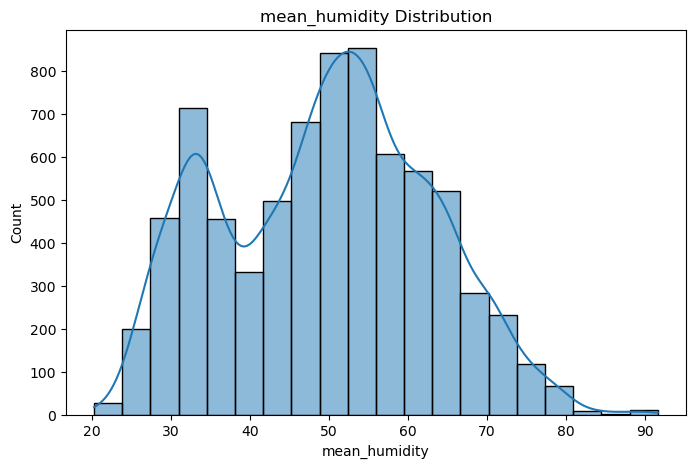

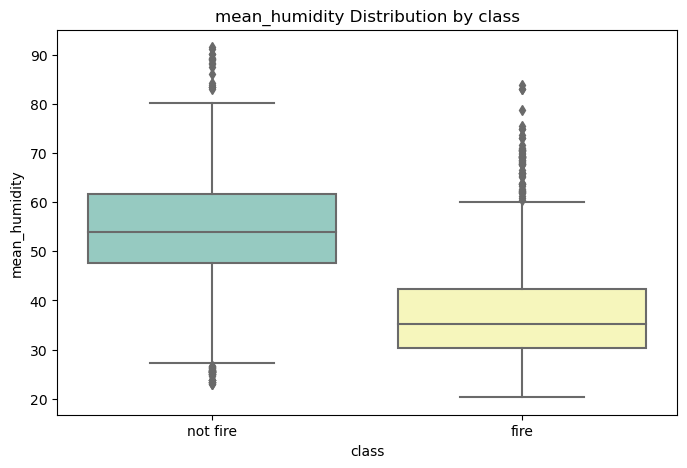

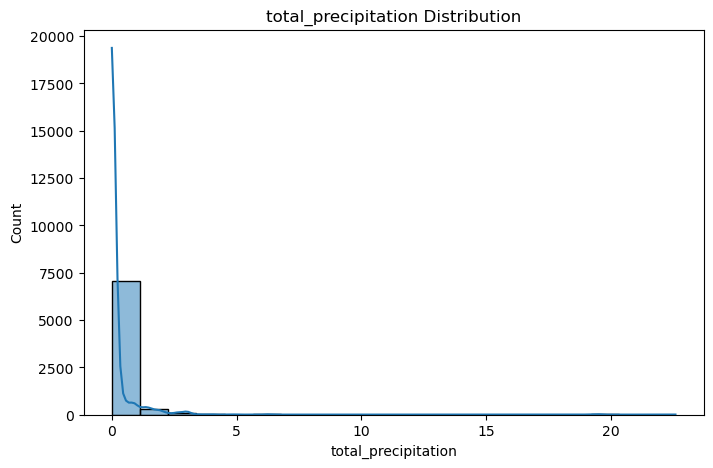

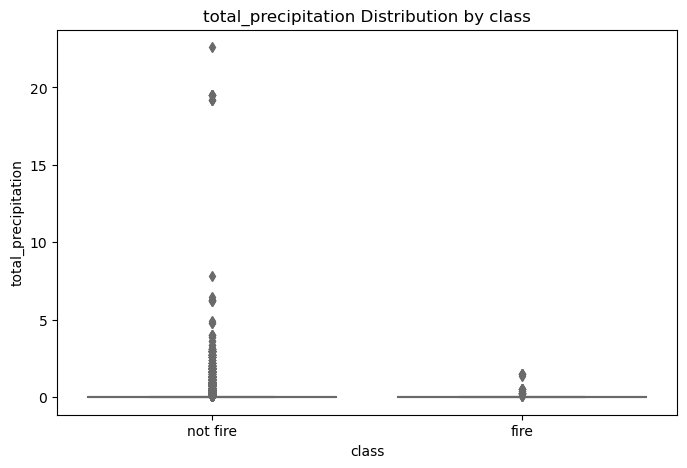

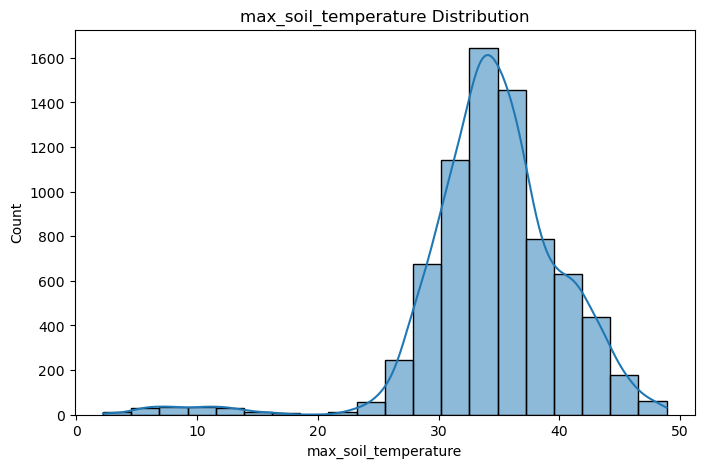

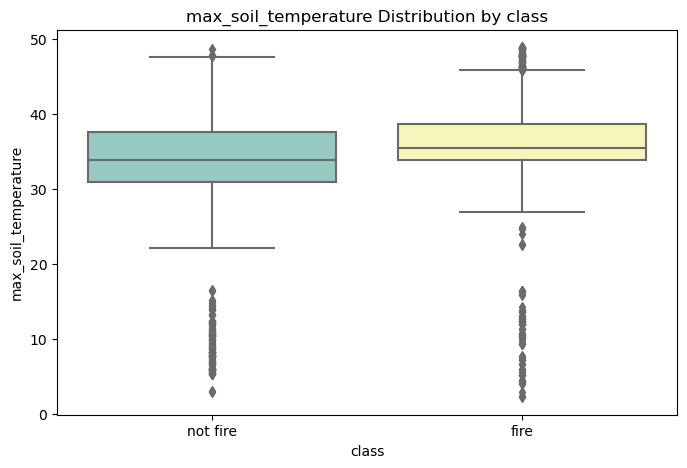

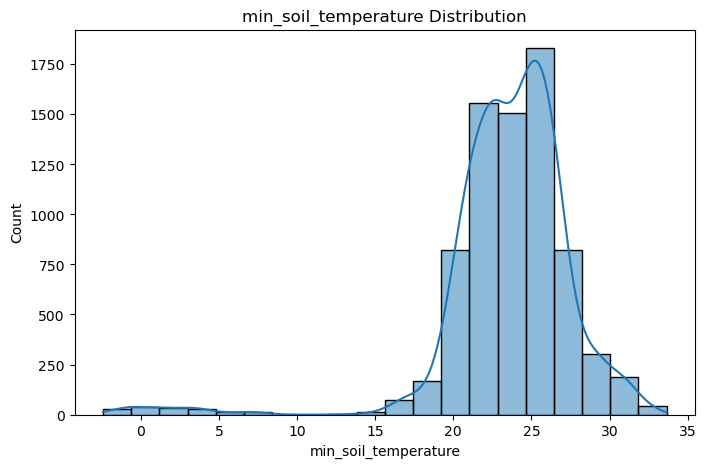

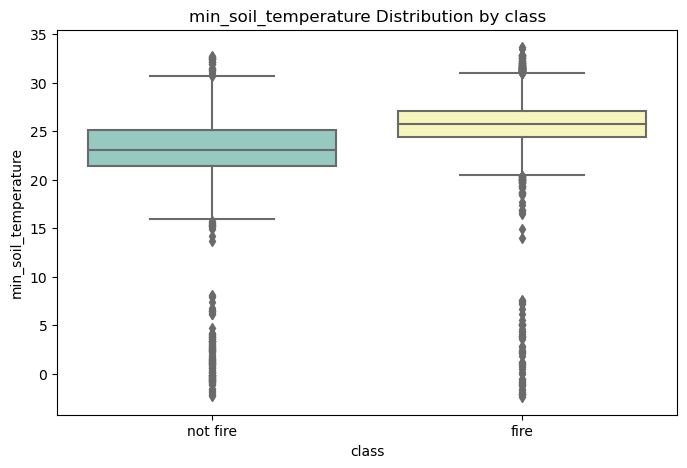

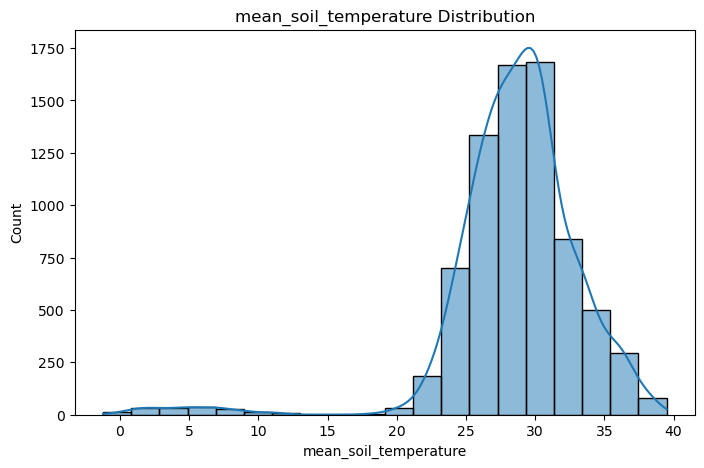

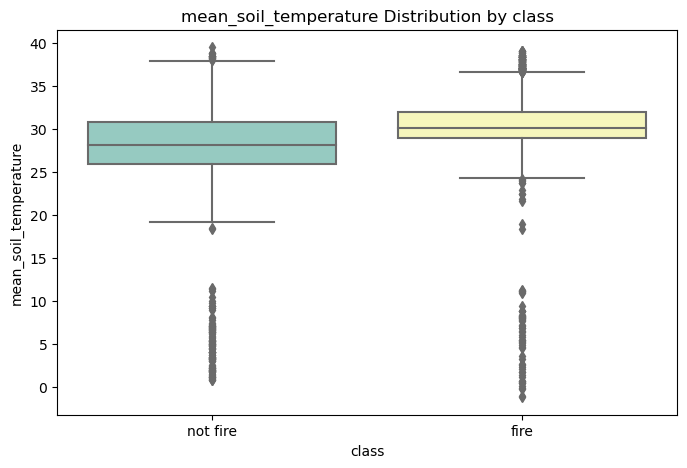

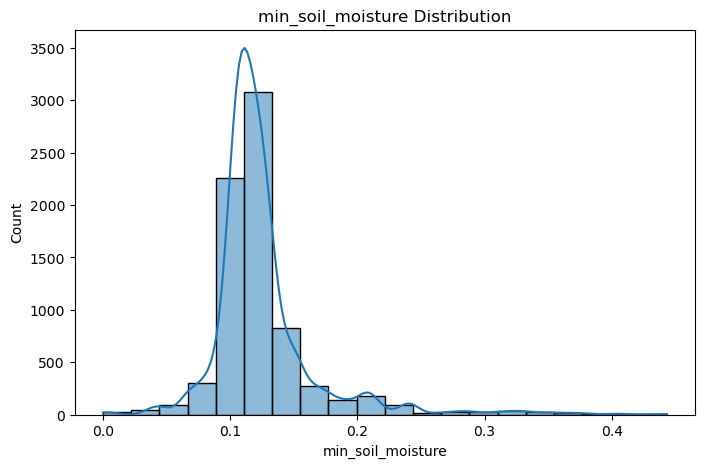

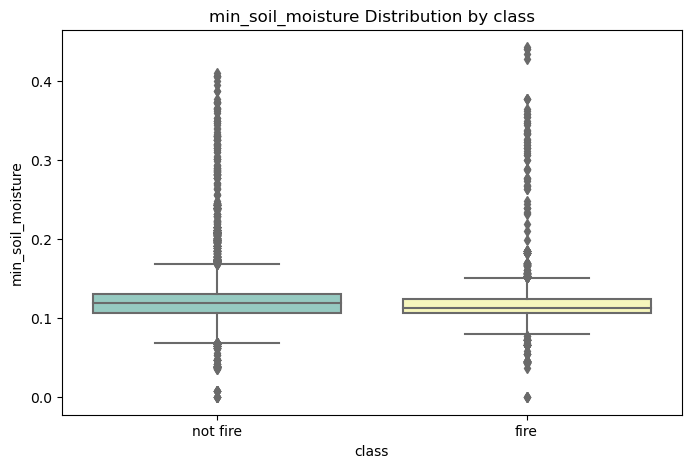

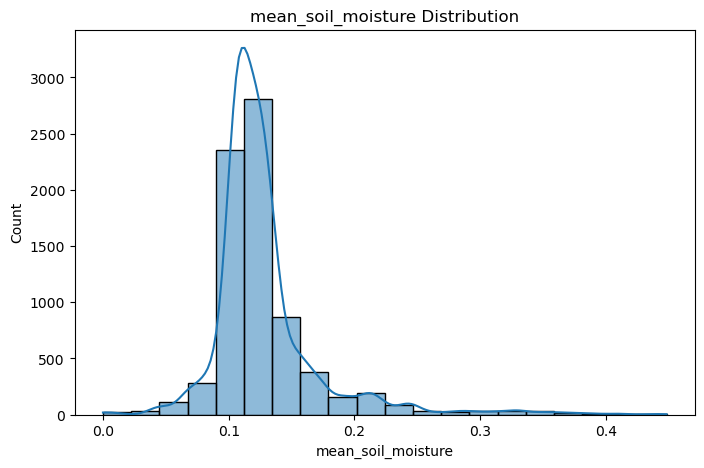

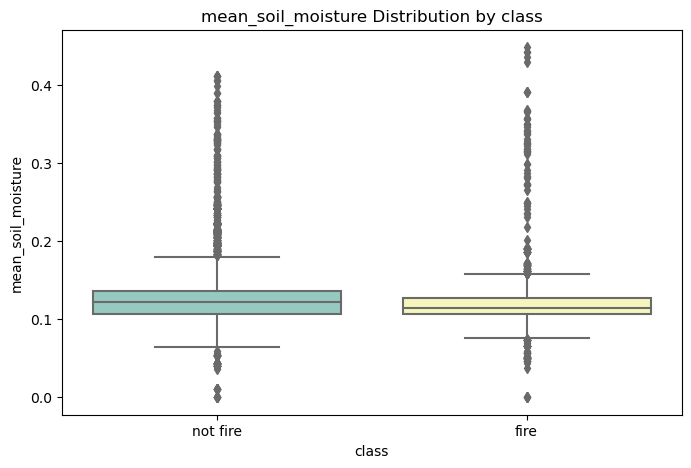

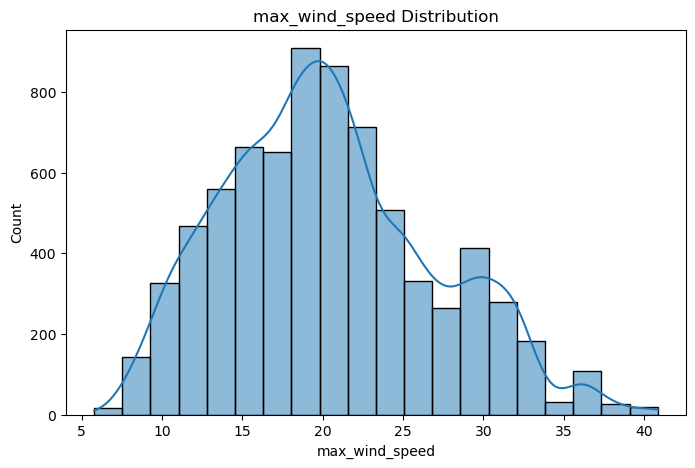

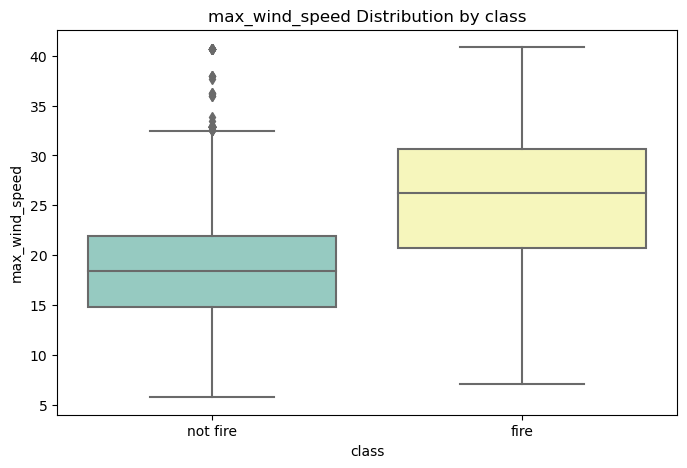

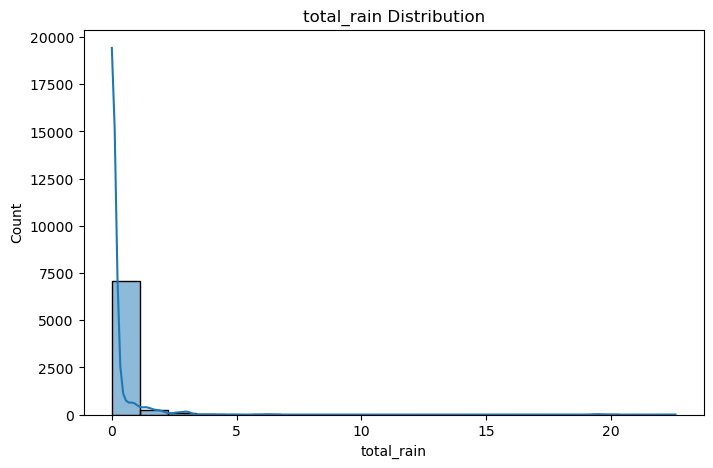

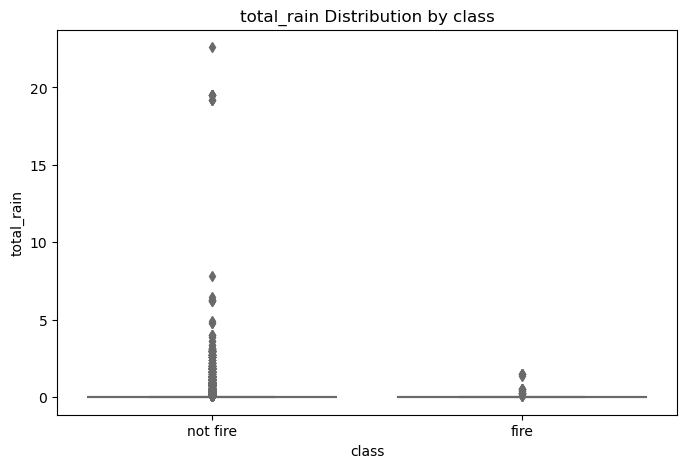

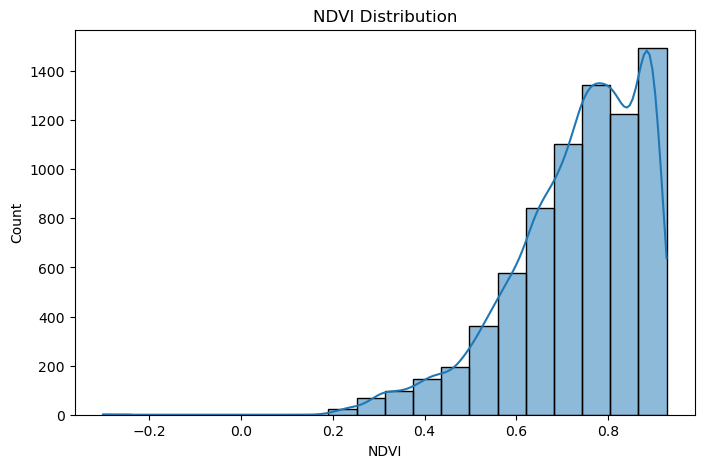

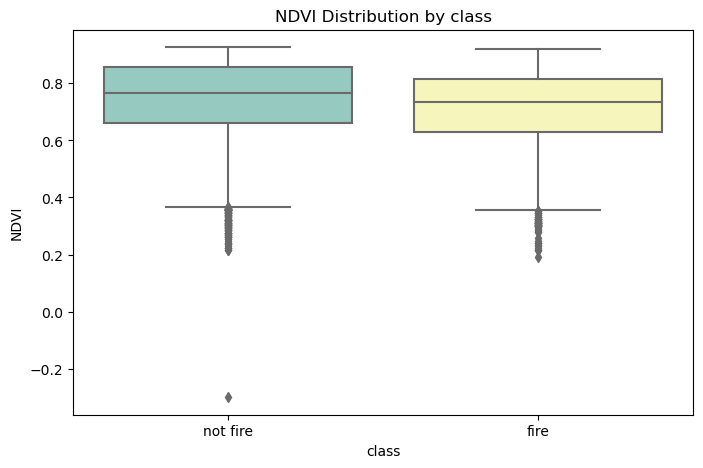

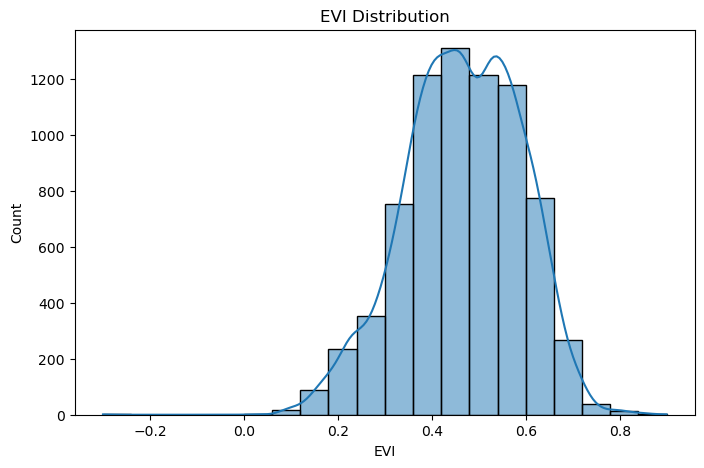

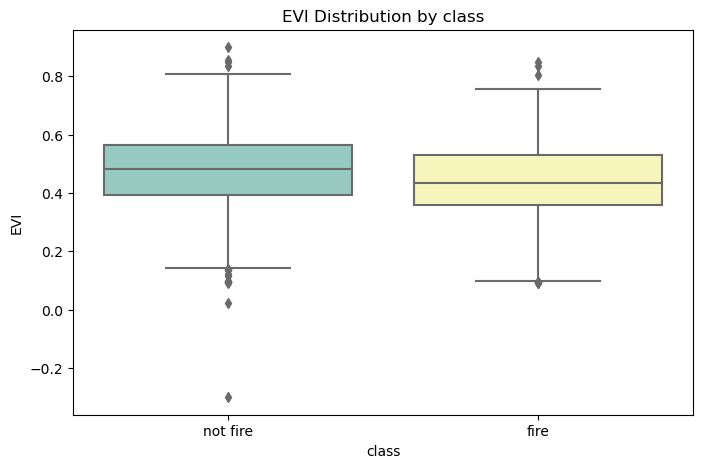

In [98]:
# Visualisation d'un Distplot sur les colonnes numériques
for i in loan_num:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_fire_prediction[i], bins=20, kde=True)
    plt.title(f'{i} Distribution')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='class', y=i, data=data_fire_prediction, palette='Set3')
    plt.title(f'{i} Distribution by class')
    plt.show()

"""

Dans cette étape, nous dessinons la matrice de corrélation pour identifier les fortes corrélations entre les variables explicatives de notre dataset. Cette analyse nous permet de détecter les variables fortement corrélées, ce qui est crucial pour simplifier notre dataset en éliminant les redondances et en sélectionnant les variables les plus représentatives.

"""


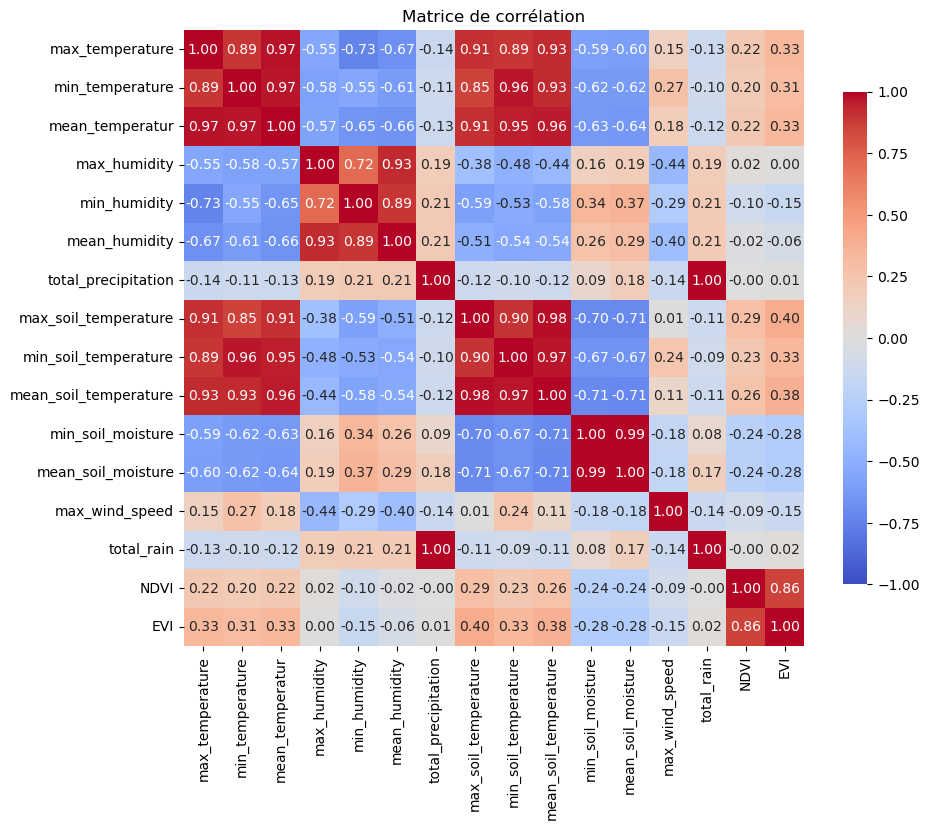

In [99]:
# Calculer la matrice de corrélation
corr = data_fire_prediction.corr()

# Utiliser Seaborn pour créer une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'shrink': .8})
plt.title('Matrice de corrélation')
plt.show()

D'après cette matrice, nous observons clairement que :
- Les mesures des mêmes caractéristiques (par exemple, humidité, temperature) présentent fortes corrélations.

Ces observations nous amènent à simplifier davantage notre dataset en réduisant le nombre de variables explicatives corrélées, afin de le rendre plus représentatif et d'éviter la redondance.

## Réduction de la Dimensionnalité par Sélection de Caractéristiques

Suite à l'analyse de corrélation, nous simplifions le dataset en supprimant les variables fortement corrélées. Par exemple, nous conservons uniquement la variable `max_temperature` et supprimons `min_temperature` et `mean_temperature`, car elles apportent des informations redondantes. Cette simplification permet de réduire la dimensionnalité du dataset et d'améliorer l'efficacité des modèles prédictifs.

#### Transformation et Normalisation de données

Avant d'utiliser des modèles de machine learning ou de réaliser des analyses statistiques, il est crucial de transformer notre dataset pour le préparer. Cette transformation inclut :
1. Le codage des variables qualitatives en variables numériques.
2. La normalisation des variables numériques pour standardiser les échelles de valeur.



In [100]:
data_fire_prediction["class"] = data_fire_prediction["class"].replace({'fire': 1, 'not fire': 0})

In [101]:
for colonne in data_fire_prediction :
    if colonne != "class":
        data_fire_prediction[colonne] = scaler.fit_transform(data_fire_prediction[[colonne]])
        

In [102]:
data_fire_prediction

,max_temperature,min_temperature,mean_temperatur,max_humidity,min_humidity,mean_humidity,total_precipitation,max_soil_temperature,min_soil_temperature,mean_soil_temperature,min_soil_moisture,mean_soil_moisture,max_wind_speed,total_rain,NDVI,EVI,class
0,-0.691126,-0.698850,-0.654809,1.140398,0.879557,0.980583,2.267922,-0.466576,-0.565306,-0.541692,-0.244983,0.103280,0.182218,2.273286,0.687899,-0.482050,0
1,0.731407,1.106335,1.086364,-1.913950,-1.117791,-1.595840,-0.210760,1.062224,0.916918,1.157027,-0.150291,-0.197908,0.053323,-0.209262,0.410344,-0.074031,1
2,2.041561,1.656002,1.960633,-1.694352,-1.790777,-1.796187,-0.210760,1.801315,1.354572,1.650004,-0.481714,-0.509579,-0.947260,-0.209262,1.111646,1.218028,0
3,-1.840035,-1.071243,-1.502150,1.238147,2.441754,2.188423,1.929920,-1.852928,-1.350137,-1.608799,1.009687,1.364261,-0.107626,1.934757,0.362320,0.546092,0
4,0.084144,-0.312207,0.034072,0.467914,0.933319,0.623871,-0.210760,0.237715,-0.221987,0.115667,-0.363348,-0.404736,-0.389909,-0.209262,0.311470,-0.520909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,0.219077,0.100738,0.327118,-0.405030,-0.565952,-0.756138,-0.210760,-0.235631,-0.050853,-0.162925,0.962341,0.906761,0.783635,-0.209262,-2.169570,-1.878543,1
7471,-0.628804,-0.509989,-0.616314,-0.959324,-0.387139,-0.678739,-0.210760,-0.703421,-0.760521,-0.709282,-0.363348,-0.382814,1.432752,-0.209262,-1.411769,-1.288373,0
7472,-0.640675,-0.697692,-0.680072,0.370107,-0.160162,-0.065839,-0.210760,-0.893238,-0.622585,-0.728066,0.110112,0.088982,0.706297,-0.209262,0.305820,0.133216,0
7473,0.448680,0.508700,0.495553,-0.012046,0.719457,0.188109,-0.210760,1.279573,0.617902,0.982952,-1.381289,-1.391217,-1.023371,-0.209262,1.279026,1.307889,0


Nous utilisons la méthode de sélection de caractéristiques pour identifier et conserver les variables les plus pertinentes. Cette méthode évalue l'importance de chaque caractéristique et sélectionne celles qui ont le plus d'impact sur le modèle prédictif. 

Nous utilisons ici `SelectKBest` avec le test du `chi2` pour sélectionner les caractéristiques les plus importantes.

In [103]:
X = data_fire_prediction[['max_temperature', 'min_temperature', 'mean_temperatur']]
y = data_fire_prediction['class']

# Appliquer la sélection de caractéristiques
selector = SelectKBest(score_func=f_regression, k=1)
X_new = selector.fit_transform(X, y)

# Vérifier quelle variable a été gardée
print(X.columns[selector.get_support(indices=True)])

Index(['max_temperature'], dtype='object')


In [104]:
X = data_fire_prediction[['max_humidity',	'min_humidity',	'mean_humidity'	]]
y = data_fire_prediction['class']

# Appliquer la sélection de caractéristiques
selector = SelectKBest(score_func=f_regression, k=1)
X_new = selector.fit_transform(X, y)

# Vérifier quelle variable a été gardée
print(X.columns[selector.get_support(indices=True)])

Index(['max_humidity'], dtype='object')


In [106]:
X = data_fire_prediction[['max_soil_temperature',	'min_soil_temperature','mean_soil_temperature'	]]
y = data_fire_prediction['class']

# Appliquer la sélection de caractéristiques
selector = SelectKBest(score_func=f_regression, k=1)
X_new = selector.fit_transform(X, y)

# Vérifier quelle variable a été gardée
print(X.columns[selector.get_support(indices=True)])

Index(['min_soil_temperature'], dtype='object')


In [107]:
X = data_fire_prediction[['min_soil_moisture',	'mean_soil_moisture'		]]
y = data_fire_prediction['class']

# Appliquer la sélection de caractéristiques
selector = SelectKBest(score_func=f_regression, k=1)
X_new = selector.fit_transform(X, y)

# Vérifier quelle variable a été gardée
print(X.columns[selector.get_support(indices=True)])

Index(['mean_soil_moisture'], dtype='object')


In [108]:
X = data_fire_prediction[['EVI',	'NDVI'		]]
y = data_fire_prediction['class']

# Appliquer la sélection de caractéristiques
selector = SelectKBest(score_func=f_regression, k=1)
X_new = selector.fit_transform(X, y)

# Vérifier quelle variable a été gardée
print(X.columns[selector.get_support(indices=True)])

Index(['EVI'], dtype='object')


In [109]:
X = data_fire_prediction[['min_soil_temperature',	'max_temperature'	]]
y = data_fire_prediction['class']

# Appliquer la sélection de caractéristiques
selector = SelectKBest(score_func=f_regression, k=1)
X_new = selector.fit_transform(X, y)

# Vérifier quelle variable a été gardée
print(X.columns[selector.get_support(indices=True)])

Index(['max_temperature'], dtype='object')


In [110]:
data_fire_prediction = data_fire_prediction [['max_temperature','max_wind_speed', 'max_humidity','mean_soil_moisture', 'EVI', "class"]]

**Calculer et afficher la matrice de corrélation**

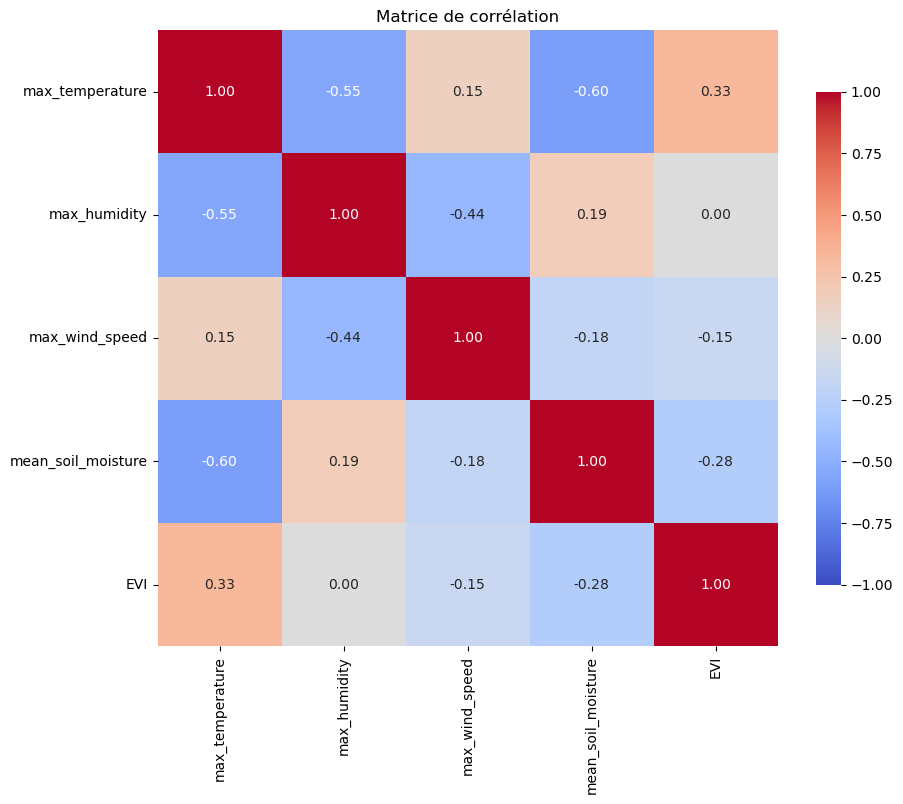

In [112]:
# Calculer la matrice de corrélation
corr = data_fire_prediction[['max_temperature', 'max_humidity','max_wind_speed','mean_soil_moisture', 'EVI']].corr()

# Utiliser Seaborn pour créer une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'shrink': .8})
plt.title('Matrice de corrélation')
plt.show()

Après avoir appliqué la sélection de caractéristiques pour réduire la dimensionnalité du dataset, nous réexaminons la matrice de corrélation pour vérifier que les caractéristiques restantes sont moins redondantes et plus représentatives. 

## Modèlisation et Evaluation

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,  KFold


**Division des Données en Ensembles d'Entraînement et de Test**

In [114]:
X= data_fire_prediction.drop(["class"], axis = 1 )
y = data_fire_prediction["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modèles de base

**Implementation basique**

In [128]:
models = [
    ('Logistic_Regression', LogisticRegression()),
    ('Decision_Tree', DecisionTreeClassifier())
]

#Dictionnaire pour stocker les métriques
metrics = {name: {} for name, _ in models}

# Entraînement des modèles et calcul des métriques
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcul des métriques
    metrics[name]['accuracy_score'] = accuracy_score(y_test, y_pred)
    metrics[name]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    metrics[name]['precision_score'] = precision_score(y_test, y_pred, zero_division=0)
    metrics[name]['recall_score'] = recall_score(y_test, y_pred,  pos_label=1)
    metrics[name]['f1_score'] =f1_score(y_test, y_pred, pos_label=1)


# Affichage des résultats
for name in metrics:
    print(f"Metrics for {name}:")
    for metric in metrics[name]:
        print(f"{metric}: {metrics[name][metric]}")
    print("\n")
type(y_pred)

Metrics for Logistic_Regression:
accuracy_score: 0.8546589389210878
confusion_matrix: [[1501  118]
 [ 208  416]]
precision_score: 0.7790262172284644
recall_score: 0.6666666666666666
f1_score: 0.7184801381692573


Metrics for Decision_Tree:
accuracy_score: 0.9558626839054837
confusion_matrix: [[1571   48]
 [  51  573]]
precision_score: 0.9227053140096618
recall_score: 0.9182692307692307
f1_score: 0.9204819277108434




numpy.ndarray

## Amélioration de performance par l'ajustement des Hyperparamètres

**LogisticRegression**

In [132]:
model = LogisticRegression()

# Définir la grille des hyperparamètres
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Ces solveurs permettent la régularisation l1
}

# Création de l'instance de GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

Meilleurs paramètres: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur score: 0.7546567504528744


**Decision Tree**

In [133]:
# Définir la grille des hyperparamètres à tester
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Créer l'instance de GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score: 0.9212651875280062


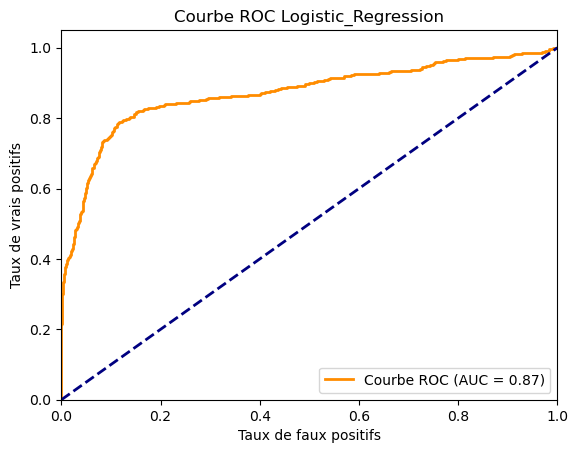

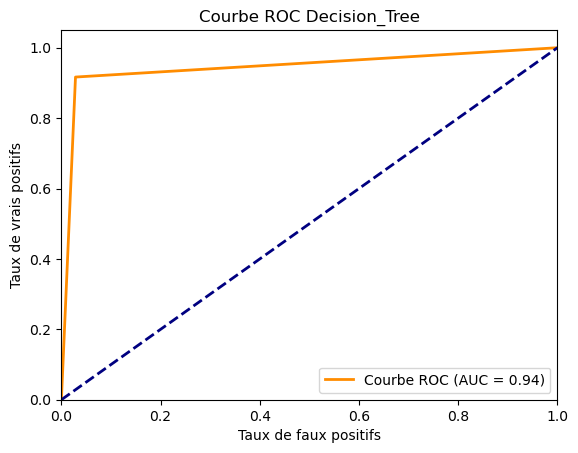

Metrics for Logistic_Regression:
accuracy_score: 0.8653588943379402
confusion_matrix: [[1483  136]
 [ 166  458]]
precision_score: 0.7710437710437711
recall_score: 0.7339743589743589
f1_score: 0.7520525451559934


Metrics for Decision_Tree:
accuracy_score: 0.9563085153811859
confusion_matrix: [[1573   46]
 [  52  572]]
precision_score: 0.9255663430420712
recall_score: 0.9166666666666666
f1_score: 0.9210950080515298




numpy.ndarray

In [138]:
models = [
    ('Logistic_Regression', LogisticRegression(C=0.001, penalty='l2', solver='liblinear', random_state=42)),
    ('Decision_Tree', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2)
)
]

#Dictionnaire pour stocker les métriques
metrics = {name: {} for name, _ in models}

# Entraînement des modèles et calcul des métriques
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calcul de la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)



    # Calcul des métriques
    metrics[name]['accuracy_score'] = accuracy_score(y_test, y_pred)
    metrics[name]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    metrics[name]['precision_score'] = precision_score(y_test, y_pred, zero_division=0)
    metrics[name]['recall_score'] = recall_score(y_test, y_pred,  pos_label=1)
    metrics[name]['f1_score'] =f1_score(y_test, y_pred, pos_label=1)
    # Affichage de la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC {name}')
    plt.legend(loc='lower right')
    plt.show()


# Affichage des résultats
for name in metrics:
    print(f"Metrics for {name}:")
    for metric in metrics[name]:
        print(f"{metric}: {metrics[name][metric]}")
    print("\n")
type(y_pred)

## Modèles avancées 

### Random Forest

In [135]:
# Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Créer l'instance de GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Meilleurs paramètres: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score: 0.9699927499310605


In [157]:
# Création du modèle Random Forest avec les hyperparamètres spécifiés
rf_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=42)

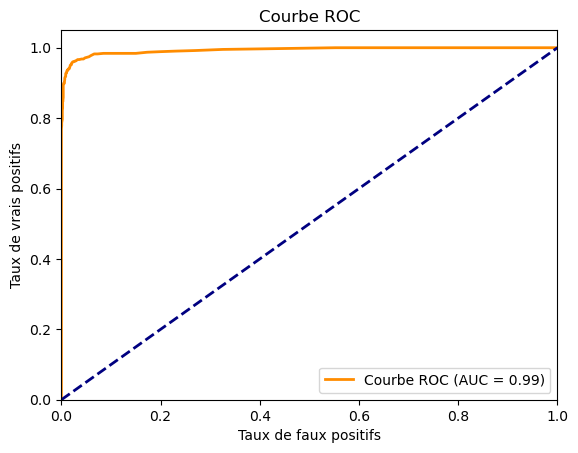

Metrics for the model:
Accuracy: 0.9724
Confusion Matrix:
[[1605   14]
 [  48  576]]
Precision: 0.9763
Recall: 0.9231
F1 Score: 0.9489


In [158]:
# Prédiction des classes et des probabilités
y_pred = rf_model.predict(X_test)
y_scores = rf_model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Calcul des métriques
accuracy_val = accuracy_score(y_test, y_pred)
conf_matrix_val = confusion_matrix(y_test, y_pred)
precision_val = precision_score(y_test, y_pred, zero_division=0)
recall_val = recall_score(y_test, y_pred, pos_label=1)
f1_val = f1_score(y_test, y_pred, pos_label=1)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Affichage des résultats
print("Metrics for the model:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_val}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")

### Réseau de neuronnes sequentiel 

In [141]:
def create_model(layers=[128, 64], activation='relu', dropout_rate=0.5, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(layers[0], activation=activation, input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    for layer in layers[1:]:
        model.add(Dense(layer, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model




In [142]:
# Création du modèle KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Définition de la grille des hyperparamètres
param_grid = {
    'layers': [[128], [128, 64], [128, 64, 32]],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.3, 0.5, 0.7],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [10, 50, 100]
}
# Configuration de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=1, n_jobs=-1)

# Entraînement avec RandomizedSearchCV
random_search_result = random_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres:", random_search_result.best_params_)
print("Meilleur score:", random_search_result.best_score_)



C:\Users\HP\AppData\Local\Temp\ipykernel_20108\2614200966.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs paramètres: {'learning_rate': 0.001, 'layers': [128, 64, 32], 'epochs': 100, 'dropout_rate': 0.5, 'batch_size': 16, 'activation': 'relu'}
Meilleur score: 0.921062707901001


In [155]:
model_ANN = create_model(layers=[128, 64, 32], activation='relu', dropout_rate=0.5, learning_rate=0.001)
# Entraînement du modèle
history = model_ANN.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16, 
                    validation_split=0.2, 
                    )

Epoch 1/100
262/262 [==============================] - 2s 3ms/step - loss: 0.4621 - accuracy: 0.8048 - val_loss: 0.3698 - val_accuracy: 0.8806
Epoch 2/100
262/262 [==============================] - 1s 3ms/step - loss: 0.3645 - accuracy: 0.8679 - val_loss: 0.3331 - val_accuracy: 0.8806
Epoch 3/100
262/262 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 0.8741 - val_loss: 0.3257 - val_accuracy: 0.8911
Epoch 4/100
262/262 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8796 - val_loss: 0.3112 - val_accuracy: 0.8921
Epoch 5/100
262/262 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.8800 - val_loss: 0.3083 - val_accuracy: 0.8892
Epoch 6/100
262/262 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8822 - val_loss: 0.3086 - val_accuracy: 0.8959
Epoch 7/100
262/262 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.8855 - val_loss: 0.2989 - val_accuracy: 0.8940

71/71 [==============================] - 0s 1ms/step


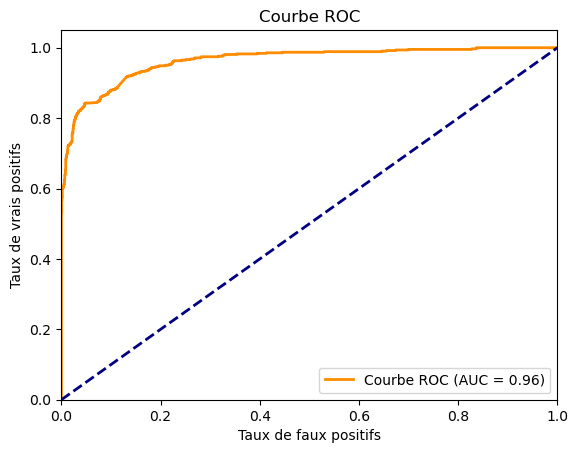

Metrics for the model:
Accuracy: 0.9104
Confusion Matrix:
[[1586   33]
 [ 168  456]]
Precision: 0.9325
Recall: 0.7308
F1 Score: 0.8194


In [156]:

# Prédiction des probabilités et des classes
y_pred = (model_ANN.predict(X_test) > 0.5).astype("int32")
y_scores = model_ANN.predict(X_test)

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Calcul des métriques
accuracy_val = accuracy_score(y_test, y_pred)
conf_matrix_val = confusion_matrix(y_test, y_pred)
precision_val = precision_score(y_test, y_pred, zero_division=0)
recall_val = recall_score(y_test, y_pred, pos_label=1)
f1_val = f1_score(y_test, y_pred, pos_label=1)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Affichage des résultats
print("Metrics for the model:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_val}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")

## Validation croisée

In [160]:
# Modèles à comparer
models = {
     'Logistic_Regression' :LogisticRegression(C=0.001, penalty='l2', solver='liblinear', random_state=42),
    'Decision_Tree': DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2),
    'Random_Forest' : RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
),
'ANN': KerasClassifier(build_fn=create_model, layers=[128, 64, 32], activation='relu', dropout_rate=0.5, learning_rate=0.001, epochs=100, batch_size=16, verbose=0)
    
}


C:\Users\HP\AppData\Local\Temp\ipykernel_20108\2510279272.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'ANN': KerasClassifier(build_fn=create_model, layers=[128, 64, 32], activation='relu', dropout_rate=0.5, learning_rate=0.001, epochs=100, batch_size=16, verbose=0)


In [164]:

# Configuration de la validation croisée
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluer chaque modèle en utilisant la validation croisée
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='f1')
    results[name] = scores
    print(f"{name}: Mean F1 = {scores.mean():.4f}, Std = {scores.std():.4f}")

Logistic_Regression: Mean F1 = 0.7550, Std = 0.0142
Decision_Tree: Mean F1 = 0.9339, Std = 0.0087
Random_Forest: Mean F1 = 0.9543, Std = 0.0100
47/47 [==============================] - 0s 1ms/step
ANN: Mean F1 = 0.8580, Std = 0.0142


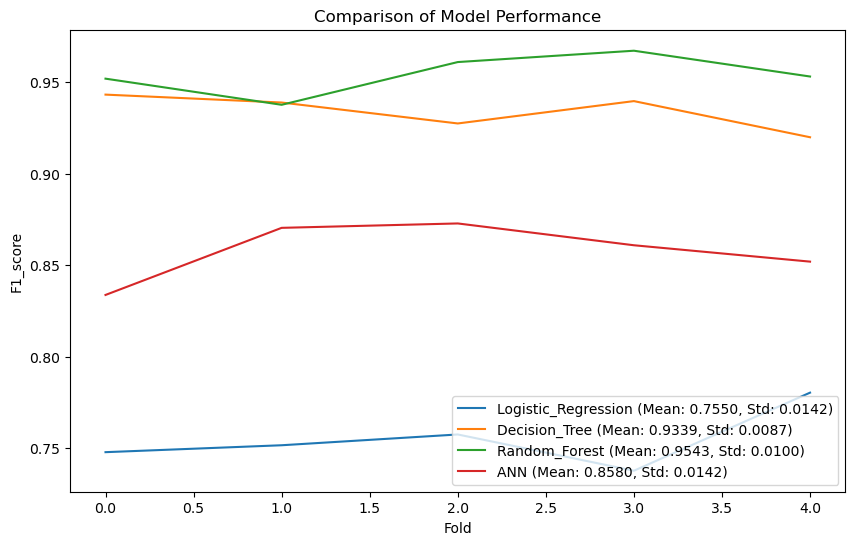

In [165]:
# Plot des résultats
plt.figure(figsize=(10, 6))
for name, scores in results.items():
    plt.plot(scores, label=f"{name} (Mean: {scores.mean():.4f}, Std: {scores.std():.4f})")

plt.xlabel('Fold')
plt.ylabel('F1_score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.show()

## Conclusion

En conclusion, bien que tous les modèles évalués montrent des niveaux de performance acceptables, le Random Forest se démarque par sa capacité à maintenir une performance supérieure et stable à travers les folds, ce qui en fait le modèle le plus recommandé pour cette tâche de classification des incendies.